In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.4/982.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-1

In [2]:
!pip install PIL
!pip install torch

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [3]:
!pip install Pillow

In [4]:
from PIL import Image, ImageDraw
from ultralytics import YOLO
from torchvision.transforms import transforms
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import requests
from io import BytesIO
import numpy as np

In [6]:
url = "https://bbt.1cdn.vn/2024/06/23/z5565533262936_2a8fcd29ef5e9dcb9888751897828d2c(1).jpg"

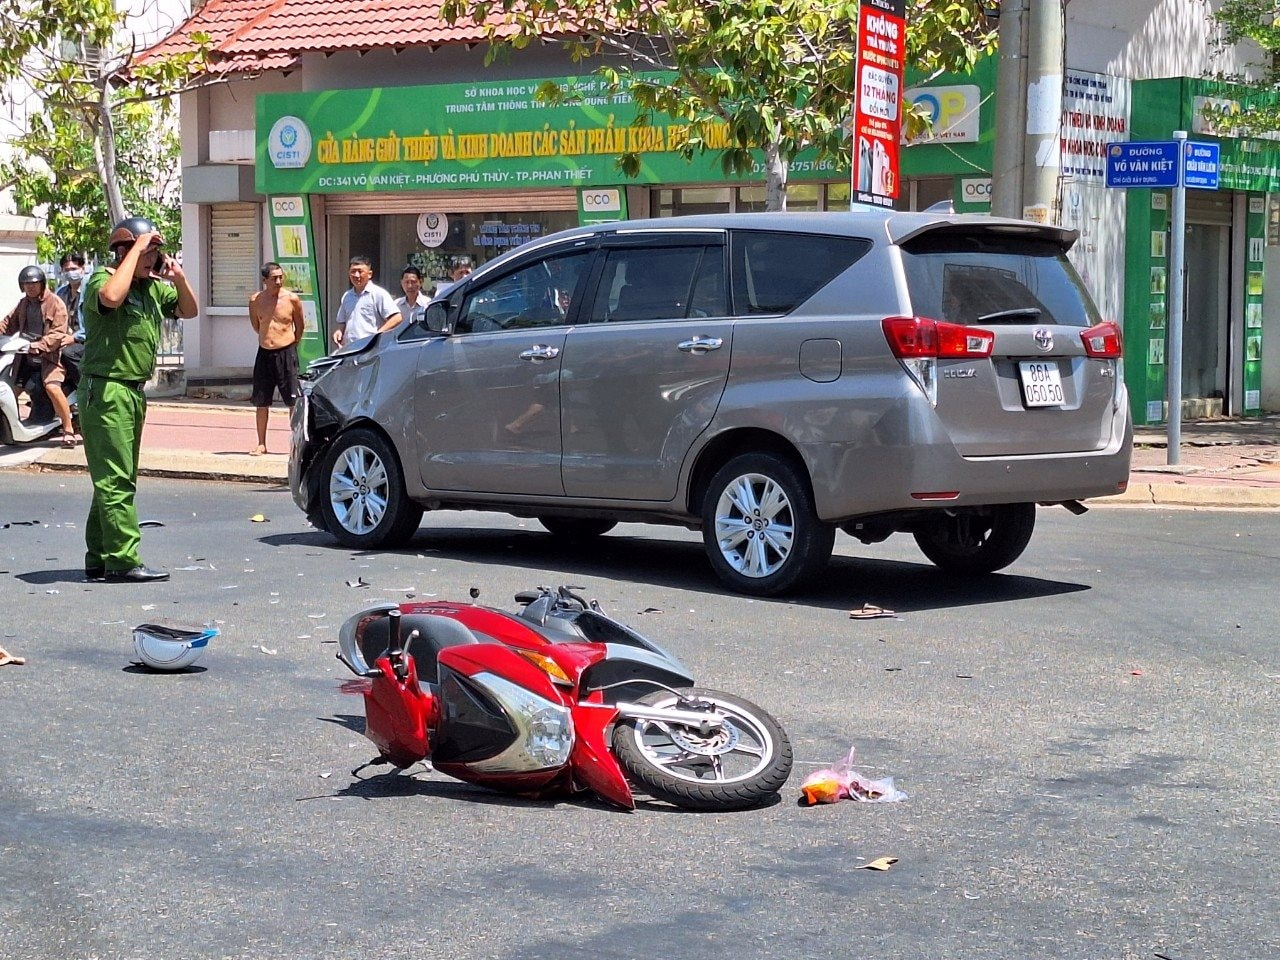

In [7]:
respon = requests.get(url)
img = Image.open(BytesIO(respon.content))
display(img)

100%|██████████| 17.7M/17.7M [00:00<00:00, 218MB/s]


so doi tuong : 1


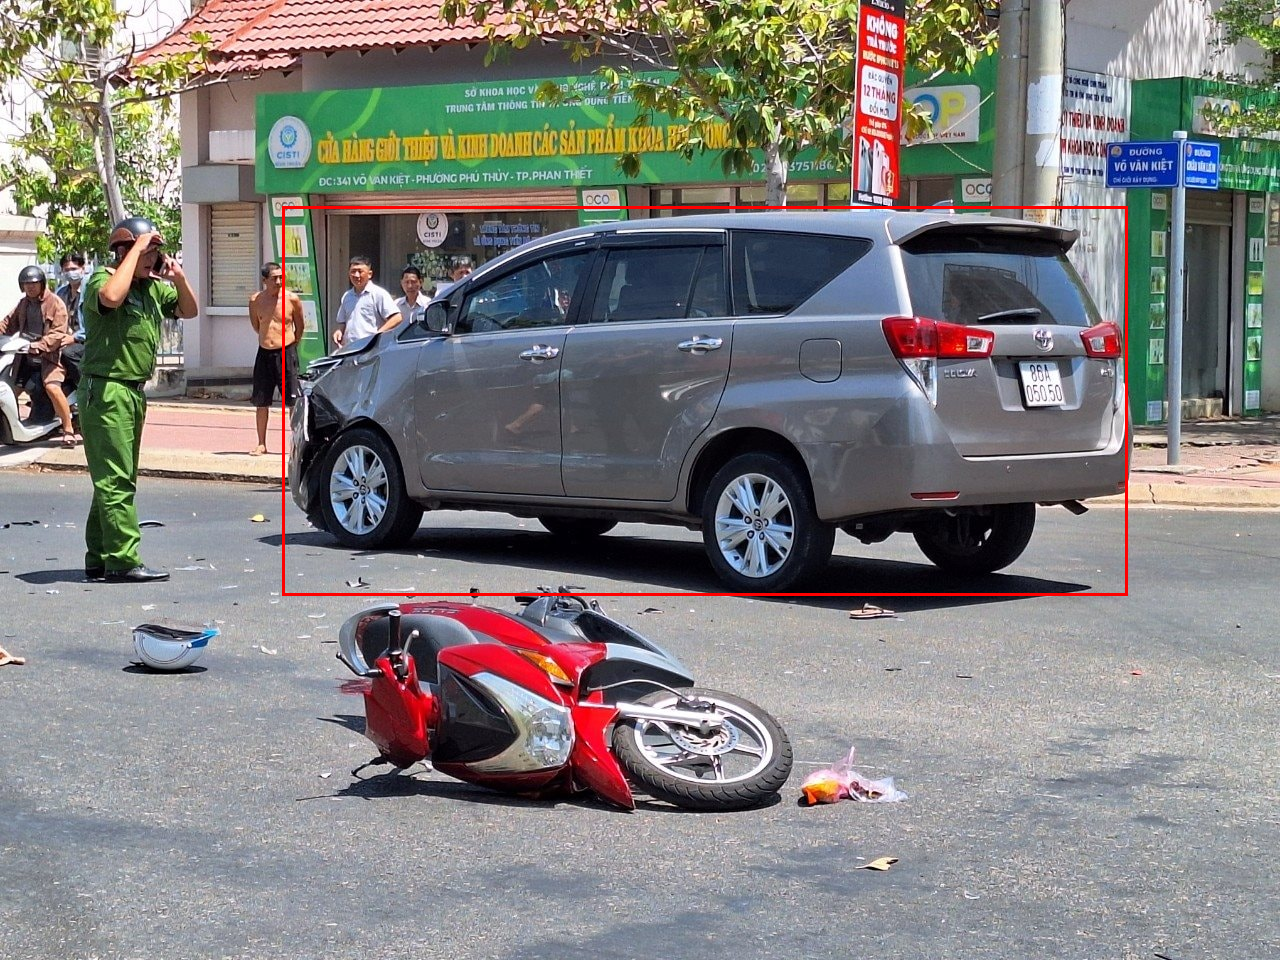

In [8]:
model = YOLO("yolov5su.pt")
img_array = np.array(img.copy())
resuilts = model(img_array, stream = True, save= False, show = False, verbose = False)
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
list_box = []
for resui in resuilts:
    for box in resui.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        if label in ['car', 'truck', 'bus']:
            draw.rectangle([x1,y1, x2, y2], outline='red', width = 3)
            list_box.append({
                "x1" : x1,
                "y1" : y1,
                "x2" : x2,
                "y2" : y2
            })
print(f"so doi tuong : {len(list_box)}")
display(img_draw)

In [9]:
import torchvision.models as models
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 176MB/s]


car


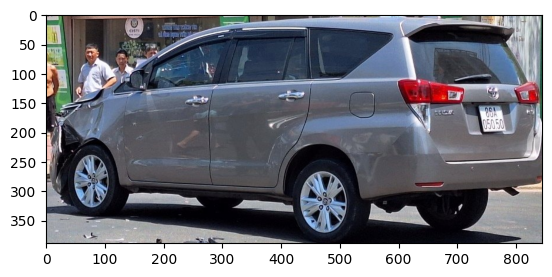

In [10]:
class_names = ["bus", "car", "struck"]
model = models.vgg16(pretrained = True)
model.classifier[6] = nn.Linear(4096, 3)
model.load_state_dict(torch.load('/kaggle/input/vgg16_classifical_car/pytorch/default/1/vgg16_kfold.pth', map_location= torch.device('cpu')))
model.eval()
img_array = np.array(img)
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
index = len(list_box)
image_crop = []
for box in list_box:
    x1, y1, x2, y2 = box["x1"], box["y1"], box["x2"], box["y2"]
    image_crop.append(img_array[y1:y2, x1:x2])
for i in range(len(image_crop)):
    image = Image.fromarray(image_crop[i])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
      output = model(image_tensor)
    probabilities = torch.nn.functional.softmax(output, dim=1)[0]
    predict = output.argmax(dim=1).item()
    print(class_names[predict])
    plt.imshow(image_crop[i])
    plt.show()
    